In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
srcdir = "/fs/lustre/cita/hadden/03_comet_diffusion/01_MEGNO_grid/megno_grids/"

# Check width calculation

In [14]:
from celmech.maps import CometMap

cmap = CometMap(5.15e-5,10,40/30,max_kmax=64,rtol=0.1)

cmap.q = 45/30

In [4]:
import sys
sys.path.append("../code/")
from sos_utils import get_map_pts

In [5]:
def calcH(theta,w,cmap,J,K):
    w0 = cmap.N - (J-K)/K
    dw = w-w0
    H=0.5*dw*dw
    for k_minus_one,amp in enumerate(cmap.amps):
        k=k_minus_one+1
        if k%K==0:
            ck = amp/k
            H+= (0.5/np.pi) * cmap.eps * ck * np.cos(k * theta) 
    return H

In [6]:
K = 1
J = K*cmap.N + 1
w0 = cmap.N - (J-K)/K
th_sx = 2*np.pi / K if K%2 else np.pi
wmin,wmax = w0 + 0.15 * np.array([-1,1])
theta,w = np.linspace(0,2*np.pi),np.linspace(wmin,wmax)
T,W = np.meshgrid(theta,w)

Energy = calcH(T,W,cmap,J,K)
Esx = calcH(th_sx,w0,cmap,J,K)

if K>1:
    CK = cmap.amps[K-1]/K
else:
    CK = cmap.amps[1]/2
Delta_w = 2 * np.sqrt(cmap.eps * CK / (2*np.pi))

# First order MMR
psq=0
Dw_at_pi=0
for k_minus_1 in range(cmap.kmax):
    k = k_minus_1 + 1
    C = cmap.amps[k_minus_1] / k
    A = (0.5/np.pi) * cmap.eps * C
    psq += 2 * (A - A * np.cos(k*theta))
    Dw_at_pi += 4 * A if k%2 else 0
wsx = w0+np.sqrt(psq)
Dw_at_pi = np.sqrt(Dw_at_pi)
plt.plot(theta,wsx)
plt.plot(theta,-wsx)

# Second order MMR
if False:
    psq=0
    Dw_at_pi=0
    for k_minus_1 in range(cmap.kmax):
        k = k_minus_1 + 1
        if k%2==0:
            C = cmap.amps[k_minus_1] / k
            A = (0.5/np.pi) * cmap.eps * C
            psq += 2 * (A - A * np.cos(k*theta))
    plt.plot(theta,-0.5+np.sqrt(psq))
    plt.plot(theta,0.5-np.sqrt(psq))



wrap1 = lambda x: np.mod(x+0.5,1)-0.5
for w in np.linspace(wmin,wmax,100):
    pts = get_map_pts((0,w),cmap,500)
    th,w = np.transpose(pts)
    w = wrap1(w)
    plt.plot(th,w,'.',ms=0.5)
# plt.contour(T,W,Energy,levels=[Esx],linewidths=[3],colors='red')

plt.xlim(0,2*np.pi)
plt.axhline(w0+Delta_w,ls='--',color='k')
plt.axhline(w0-Delta_w,ls='--',color='k')
plt.axhline(w0+Dw_at_pi,ls='--',color='b')
plt.axhline(w0-Dw_at_pi,ls='--',color='b')

IndexError: index 16 is out of bounds for axis 0 with size 16

# Make theory curve

In [ ]:
qvals = np.linspace(45,65,8)

eps_crits_2nd_order = np.zeros(len(qvals))
eps_crits = np.zeros(len(qvals))
eps_crits_tau2 = np.zeros(len(qvals))
reset = True
slopes,intercepts = np.zeros((2,len(qvals)))

for i,q in enumerate(qvals):
    cmap.q = q/30
    plt.plot(cmap.amps,label="{:.1f}".format(q))
    eps_crit = cmap.get_eps_crit()
    eps_crits[i] = eps_crit
    eps_crits_tau2[i] = cmap.get_eps_crit(tau=2)
    eps_crits_2nd_order[i] = cmap.get_eps_crit(kmax=2)
    kmax = cmap.kmax
    ks,amps = np.transpose([(km1+1,a/(km1+1)) for km1,a in enumerate(cmap.amps)])
    slopes[i],intercepts[i] = np.polyfit(ks[kmax//2:],np.log(amps[kmax//2:]),1)

plt.yscale('log')
plt.legend()

In [ ]:
qvals_more = np.linspace(35,41,5,endpoint=True)


In [7]:
from celmech.maps import _comet_map_get_ck_arrays

In [10]:
cmap.rtol = 0.05
cmap.atol = 1e-8

In [11]:
cmap.status()

---------------------------------
celmech CometMap object
Pericenter distance:	2.1666666666666665
Planet mass:	5.15e-05
N:1 Resonance:	10:9
Epsilon parameter:	0.007171254747931742
mod 1:	True



In [12]:
cmap

<celmech.maps.CometMap object at 0x7f84e4548670, m=5.15e-05, q=2.1666666666666665, N=10, kmax=8>

In [44]:
_comet_map_get_ck_arrays(35/30,cmap.rtol,cmap.atol,64)

/cita/h/home-2/hadden/Projects/01_celmech/celmech/celmech/miscellaneous.py:616: LinAlgWarning: Diagonal number 128 is exactly zero. Singular matrix.
  return lu_solve(lu_factor(A),y)
/cita/h/home-2/hadden/Projects/01_celmech/celmech/celmech/miscellaneous.py:731: UserWarning: Exceeded maximum number of quadruature points without converging.
N=256, delta = nan, target = 1e-08
  warnings.warn(msg)
/cita/h/home-2/hadden/Projects/01_celmech/celmech/celmech/maps.py:817: UserWarning: Failed to meet relative error tolerance 0.04779093092843856 for k<64 
  warn("Failed to meet relative error tolerance {} for k<{} ".format(rtol,kmax))


(64,
 array([6.64808949e-01, 1.37239744e+00, 8.72146187e-01, 5.98043173e-01,
        4.28162906e-01, 3.15227877e-01, 2.36687319e-01, 1.80329902e-01,
        1.38952629e-01, 1.08038520e-01, 8.46226719e-02, 6.66893856e-02,
        5.28298243e-02, 4.20371538e-02, 3.35786311e-02, 2.69128912e-02,
        2.16348732e-02, 1.74382330e-02, 1.40891479e-02, 1.14077261e-02,
        9.25460888e-03, 7.52118174e-03, 6.12233868e-03, 4.99107704e-03,
        4.07442309e-03, 3.33033550e-03, 2.72533503e-03, 2.23267828e-03,
        1.83094240e-03, 1.50292263e-03, 1.23476943e-03, 1.01531015e-03,
        8.35513836e-04, 6.88067356e-04, 5.67038626e-04, 4.67608280e-04,
        3.85855239e-04, 3.18584951e-04, 2.63191470e-04, 2.17546484e-04,
        1.79909837e-04, 1.48857250e-04, 1.23221839e-04, 1.02046711e-04,
        8.45464893e-05, 7.00760371e-05, 5.81050020e-05, 4.81970697e-05,
        3.99930372e-05, 3.31969875e-05, 2.75649842e-05, 2.28958188e-05,
        1.90234312e-05, 1.58106935e-05, 1.31443103e-05, 1.0

In [26]:
cmap.kmax = 60

In [27]:
cmap.q = 45/30

In [28]:
cmap._update_amplitudes()

In [31]:
cmap._kmax

0

/cita/h/home-2/hadden/Projects/01_celmech/celmech/celmech/maps.py:1212: RuntimeWarning: divide by zero encountered in double_scalars
  return tau*tau/tot/tot


ValueError: not enough values to unpack (expected 2, got 0)

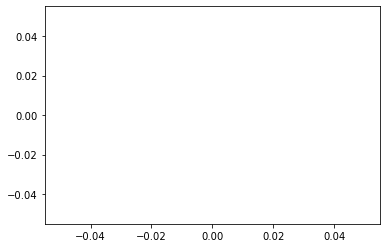

In [14]:
slopes_more,intercepts_more = np.zeros((2,len(qvals_more)))
eps_crits_2nd_order_more = np.zeros(len(qvals_more))
eps_crits_more = np.zeros(len(qvals_more))
eps_crits_more_tau2 = np.zeros(len(qvals_more))
for i,q in enumerate(qvals_more):
    cmap.q = q/30
    plt.plot(cmap.amps,label=q)
    eps_crit = cmap.get_eps_crit()
    eps_crits_more[i] = eps_crit
    eps_crits_more_tau2[i] = cmap.get_eps_crit(tau=2)
    eps_crits_2nd_order_more[i] = cmap.get_eps_crit(kmax=2)
    
    ks,amps = np.transpose([(km1+1,a/(km1+1)) for km1,a in enumerate(cmap.amps)])
    slopes_more[i],intercepts_more[i] = np.polyfit(ks[30:],np.log(amps[30:]),1)
    

plt.yscale('log')

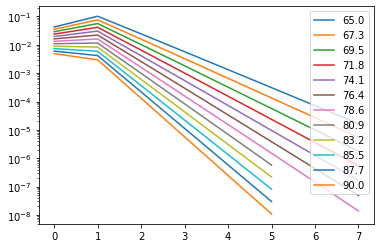

In [9]:
qvals_evenmore = np.linspace(65,3*30,12)
slopes_evenmore,intercepts_evenmore = np.zeros((2,len(qvals_evenmore)))
cmap.kmax=8
for i,q in enumerate(qvals_evenmore):
    if q>80:
        cmap.kmax = 6
    cmap.q = q/30
    plt.plot(cmap.amps,label="{:.1f}".format(q))
    kmax = cmap.kmax
    ks,amps = np.transpose([(km1+1,a/(km1+1)) for km1,a in enumerate(cmap.amps)])
    slopes_evenmore[i],intercepts_evenmore[i] = np.polyfit(ks[kmax//2:],np.log(amps[kmax//2:]),1)
plt.legend()
plt.yscale('log')

In [12]:
qvals_all = np.concatenate((qvals_more,qvals))
eps_crits_all = np.concatenate((eps_crits_more,eps_crits))
eps_crits_all_tau2 = np.concatenate((eps_crits_more_tau2,eps_crits_tau2))
eps_crits_2nd_order_all = np.concatenate((eps_crits_2nd_order_more,eps_crits_2nd_order))

In [13]:
a_crit = (eps_crits_all / cmap.m / 3)**(2/5)
a_crit_tau2 = (eps_crits_all_tau2 / cmap.m / 3)**(2/5)
a_crit_so = (eps_crits_2nd_order_all / cmap.m / 3)**(2/5)

# Read simulation results

In [15]:
srcdir="/fs/lustre/cita/hadden/03_comet_diffusion/01_MEGNO_grid/megno_grids/"
all_tLy = []
all_megno = []
all_eject = []
for I in range(9):
    fi = srcdir+"result{}.npy".format(I)
    data = np.load(fi)
    all_megno.append(data[:,:,0])
    all_tLy.append(1/data[:,:,1])
    all_eject.append(data[:,:,2])

tLy = np.block([all_tLy[:3],all_tLy[3:6],all_tLy[6:]])
megno = np.block([all_megno[:3],all_megno[3:6],all_megno[6:]])
eject = np.block([all_eject[:3],all_eject[3:6],all_eject[6:]])

tLy[megno<3] = 1e9
tLy[eject==1.] = 1e3
vals = np.log10(tLy)

/tmp/ipykernel_3649868/147726612.py:18: RuntimeWarning: invalid value encountered in log10
  vals = np.log10(tLy)


In [16]:
srcdir="/fs/lustre/cita/hadden/03_comet_diffusion/01_MEGNO_grid/megno_grids2/"

all_tLy_more = []
all_megno = []
all_eject = []
for I in range(9):
    fi = srcdir+"result{}.npy".format(I)
    data = np.load(fi)
    all_megno.append(data[:,:,0])
    all_tLy_more.append(1/data[:,:,1])
    all_eject.append(data[:,:,2])
    
srcdir="/fs/lustre/cita/hadden/03_comet_diffusion/01_MEGNO_grid/megno_grids3/"
all_tLy_3 = []
all_megno_3 = []
all_eject_3 = []
for I in range(3):
    fi = srcdir+"result{}.npy".format(I)
    data = np.load(fi)
    all_megno_3.append(data[:,:,0])
    all_tLy_3.append(1/data[:,:,1])
    all_eject_3.append(data[:,:,2])

tLy_more = np.hstack((
    np.block([all_tLy_more[:3],all_tLy_more[3:6],all_tLy_more[6:]]),
    np.vstack(all_tLy_3)
))
megno_more = np.hstack((
    np.block([all_megno[:3],all_megno[3:6],all_megno[6:]]),
    np.vstack(all_megno_3)
))
    
eject_more = np.hstack((
    np.block([all_eject[:3],all_eject[3:6],all_eject[6:]]),
    np.vstack(all_eject_3)
))
tLy_more[megno_more<3] = 1e9
tLy_more[eject_more==1.] = 1e3
vals_more = np.log10(tLy_more)

/tmp/ipykernel_3649868/85383583.py:39: RuntimeWarning: invalid value encountered in log10
  vals_more = np.log10(tLy_more)


In [17]:
def qcrit_batygin(a,aN = 30,mN = 5.15e-5):
    log_arg = 24*24 * mN *(a/aN)**(5/2) / 5
    return aN * np.sqrt(np.log(log_arg))

In [18]:
srcdir="/fs/lustre/cita/hadden/03_comet_diffusion/01_MEGNO_grid/megno_grids2/"
aranges = [np.load(srcdir + "a_range{}.npy".format(i)) for i in range(9)]
qranges = [np.load(srcdir + "q_range{}.npy".format(i)) for i in range(9)]

amin,amax=np.min(np.array(aranges)),np.max(np.array(aranges))
qmin,qmax=np.min(np.array(qranges)),np.max(np.array(qranges))

In [19]:
import pandas as pd

cols = "object,omega,Omega,inclination,e,q,a,M,n,Q,P,H"

cols = cols.split(",")

tnos_data = pd.read_csv("../data/mpc_tnos_big.tsv",sep="\t",names=cols)

tnos_data['cosi'] = np.cos(tnos_data.inclination * np.pi / 180)
tnos_data['Lz'] = np.sqrt((tnos_data.a * (1 - tnos_data.e * tnos_data.e))) * tnos_data.cosi
tnos_data['qmin'] = tnos_data.a - np.sqrt(tnos_data.a * (tnos_data.a - tnos_data.Lz**2))

/tmp/ipykernel_3649868/291657099.py:3: RuntimeWarning: invalid value encountered in sqrt
  return aN * np.sqrt(np.log(log_arg))


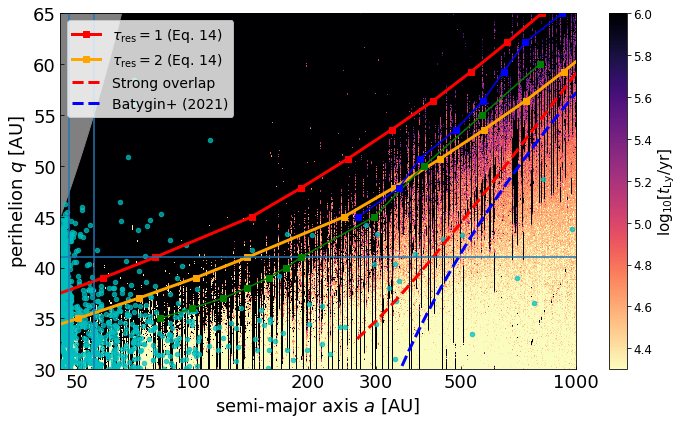

In [111]:
fig=plt.figure(figsize=(10,6))
plt.tick_params(direction='in',labelsize=18)
xticks = [50,75,100,200,300,500,1_000]
plt.xticks(np.log10(xticks),labels=["{}".format(x) for x in xticks])
ax = plt.gca()
im=plt.imshow(
    vals,
    interpolation="none",vmin=4.3,vmax=6,
    cmap="magma_r",origin="lower",aspect="auto",
    extent=[np.log10(150),3,30,65]
)

im_more=plt.imshow(
    vals_more,
    interpolation="none",vmin=4.3,vmax=6,
    cmap="magma_r",origin="lower",aspect="auto",
    extent=[np.log10(amin),np.log10(150),qmin,qmax]
)

cb = plt.colorbar(im, ax=ax)
cb.ax.tick_params(labelsize=12)
cb.set_label(r"$\log_{10}[t_\mathrm{Ly}/\mathrm{yr}]$",size=15)

plt.plot(np.log10(30*a_crit),qvals_all,marker='s',color='r',lw=3,label=r"$\tau_\mathrm{res} = 1$ (Eq. 14)")

plt.plot(np.log10(30*a_crit_tau2),qvals_all,marker='s',color='orange',lw=3,label=r"$\tau_\mathrm{res} = 2$ (Eq. 14)")

plt.plot(np.log10(30*a_crit_so),qvals_all,ls='--',color='r',lw=3,label=r"Strong overlap")

a = np.geomspace(150,1e3)
plt.plot(np.log10(a),qcrit_batygin(a),color='b',lw=3,ls='--',label=r"Batygin+ (2021)")
plt.xlim(np.log10(amin),np.log10(1e3))
plt.ylim(30,65)
plt.legend(loc='upper left',fontsize=14)
plt.xlabel("semi-major axis $a$ [AU]",fontsize=18)
plt.ylabel("perihelion $q$ [AU]",fontsize=18)
plt.tight_layout()

q,max_x = np.transpose(np.load("../data/max_x-vs-q.npy"))
plt.plot(np.log10(30/max_x),q,'gs-',zorder=99)

q_lastKAM,KAMNmin = np.transpose(np.load("../data/last_kam_curves.npy"))
loga_lastKAM = np.log10(30 * KAMNmin**(2/3))
plt.plot(loga_lastKAM,q_lastKAM,'bs-',zorder=99)


im_blank=plt.imshow(
    [[1,1],[1,1]],
    interpolation="none",vmin=0,vmax=1,
    cmap="magma_r",origin="lower",aspect="auto",
    extent=[np.log10(amin),np.log10(150),45,65]
)
plt.fill_between(np.log10(np.linspace(45,65)),np.linspace(45,65),65,color='gray')
#plt.savefig("../figures/MEGNO_map.png")

#plt.scatter(np.log10(tnos_data.a),tnos_data.q,color='b',s=20,alpha=0.5)
plt.scatter(np.log10(tnos_data.a),tnos_data.qmin,color='c',s=20,alpha=0.75)

plt.axvline(np.log10(30 * (2)**(2/3)))
plt.axvline(np.log10(30 * (5/2)**(2/3)))
plt.axhline(q[6])

In [107]:
from rebound.interruptible_pool import InterruptiblePool
pool = InterruptiblePool(processes=4)
qvals = np.linspace(45,65,4)
results = pool.map(experiment,qvals)
